In [9]:
import pandas as pd
import pandas.tseries
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
e = np.e
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

pd.set_option('display.max_rows', 20)
pd.options.display.max_columns=300

In [10]:
data = pd.read_csv('../../Data/zillow_data.csv')
data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [11]:
texas_data= data[data['State'] == 'TX']
texas_data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,193400.0,193100.0,192700.0,193000.0,193700.0,194800.0,196100.0,197800.0,199700.0,201900.0,204500.0,207800.0,211500.0,214900.0,217800.0,221100.0,224100.0,226700.0,228200.0,228500.0,227200.0,224900.0,221900.0,219100.0,216900.0,215400.0,214500.0,214600.0,215600.0,217000.0,218400.0,219600.0,220000.0,219100.0,216800.0,213100.0,208700.0,204000.0,199600.0,195700.0,192800.0,190800.0,189600.0,189200.0,189200.0,189600.0,190300.0,190800.0,191000.0,190700.0,190300.0,189800.0,189200.0,188600.0,188000.0,187500.0,187200.0,187000.0,186900.0,187100.0,187700.0,188800.0,190300.0,191800.0,193000.0,193900.0,194500.0,195100.0,195700.0,196400.0,197400.0,198500.0,199600.0,200300.0,200800.0,201000.0,201000.0,201000.0,200900.0,200900.0,200900.0,201200.0,201600.0,202200.0,202700.0,203300.0,203900.0,204500.0,205100.0,205800.0,206500.0,207200.0,207800.0,208400.0,208900.0,209400.0,209700.0,210000.0,210400.0,211000.0,211600.0,212400.0,213000.0,213400.0,213600.0,213800.0,213900.0,214100.0,213900.0,213500.0,212600.0,211200.0,209500.0,207900.0,206700.0,205900.0,205300.0,204600.0,203800.0,203200.0,202400.0,201700.0,201200.0,200700.0,200000.0,199700.0,199700.0,199900.0,200100.0,200200.0,200200.0,200100.0,201300.0,202000.0,202100.0,202700.0,203700.0,203300.0,203100.0,202900.0,202400.0,202400.0,202500.0,202500.0,202400.0,202500.0,202100.0,201300.0,200700.0,200500.0,200000.0,199300.0,199100.0,199200.0,199400.0,199500.0,199600.0,200100.0,200700.0,201800.0,202700.0,203000.0,203000.0,20300

In [12]:
austin_city = texas_data[texas_data['Metro'] == 'Austin']
austin_city

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
18,92593,78660,Pflugerville,TX,Austin,Travis,19,138900.0,138600.0,138400.0,138500.0,138700.0,139000.0,139300.0,139600.0,139900.0,140200.0,140600.0,141300.0,141800.0,142200.0,142400.0,142400.0,142100.0,141800.0,141400.0,141000.0,140600.0,140100.0,139600.0,139100.0,138500.0,138000.0,137400.0,136900.0,136500.0,136300.0,136400.0,136700.0,137100.0,137700.0,138400.0,139300.0,140300.0,141400.0,142600.0,143700.0,144800.0,145900.0,146800.0,147500.0,148000.0,148400.0,148500.0,148600.0,148600.0,148700.0,148700.0,148800.0,149000.0,149200.0,149400.0,149600.0,149700.0,149600.0,149600.0,149600.0,149700.0,149900.0,150300.0,150700.0,151300.0,151800.0,152300.0,152700.0,153100.0,153300.0,153500.0,153700.0,154000.0,154300.0,154500.0,154800.0,155000.0,155000.0,154800.0,154400.0,153800.0,153300.0,152900.0,152600.0,152400.0,152200.0,152200.0,152100.0,152000.0,152000.0,152000.0,152200.0,152800.0,153800.0,155100.0,156600.0,158000.0,159100.0,159900.0,160400.0,160800.0,161100.0,161500.0,161900.0,162200.0,162500.0,162700.0,162700.0,162500.0,162100.0,161600.0,161100.0,160700.0,160300.0,160100.0,160100.0,160200.0,160200.0,160300.0,160300.0,160500.0,160700.0,161200.0,161800.0,162600.0,163500.0,164200.0,164800.0,165400.0,166000.0,166600.0,167100.0,167600.0,168200.0,168800.0,169500.0,170200.0,170900.0,171700.0,172600.0,173300.0,173800.0,174100.0,174300.0,174300.0,174300.0,174400.0,174400.0,174300.0,174100.0,173900.0,173500.0,173100.0,172600.0,172300.0,172000.0,171600.0,171300.0,170800.0,170300.0,169700.0,169400.0,169500.0,169700.0,169900.0,170100.0,170400.0,170500.0,170600.0,170900.0,171400.0,171600.0,171600.0,171600.0,171500.0,171200.0,171000.0,170400.0,169800.0,169600.0,169600.0,169000.0,167800.0,166900.0,166500.0,166100.0,165400.0,165000.0,165100.0,165600.0,165500.0,165000.0,164700.0,165100.0,165800.0,166500.0,167100.0,1

In [5]:
cutoff = '2017-04-01'
cutoff

# Define train and test sets according to the index found above
train = zip_76530[:cutoff]

test = zip_76530[cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

NameError: name 'zip_76530' is not defined

In [1]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [2]:
def melt_row(i):
    row = austin_city.iloc[i:i+1]
    row_name = list(row.iloc[:, 2])[0]
    row_melted = melt_data(row)
    return row_name, row_melted

In [3]:
def test_stationarity(series_i):
    test_results = adfuller(series_i)
    return test_results[0]

In [4]:
def log_transform(series_i):
    log_transformed = np.log(series_i)
    dropped_nans = log_transformed.dropna()
    return dropped_nans

In [5]:
def run_auto_arima(series_i):
    
    gridsearch = pm.auto_arima(series_i,
                            start_p = 0,
                            max_p = 3,
                            d = 0, 
                            max_d = 3, 
                            start_q = 0,
                            max_q = 3,
                            seasonal=True,
                            m = 12,
                            suppress_warnings=True)
    
    model = ARIMA(series_i, 
                  order = gridsearch.order, 
                  seasonal_order = gridsearch.seasonal_order,
                  enforce_stationarity=False)
    
    # print(gridsearch.order, gridsearch.seasonal_order)
    
    return model.fit()

In [6]:
def make_prediction(model, start, end):
    prediction = model.predict(start, end)
    return prediction

In [7]:
def run_arima_model(i, start, end):
    
    row_name, row_series = melt_row(i)
    
    log_row_series = log_transform(row_series)
    
    model = run_auto_arima(log_row_series)
    
    log_prediction = model.predict(start, end)
    
    prediction = e ** log_prediction
    
    prediction_df = pd.DataFrame(prediction.values, prediction.index)
    
    return row_name, row_series, prediction_df

In [13]:
austin_city

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
18,92593,78660,Pflugerville,TX,Austin,Travis,19,138900.0,138600.0,138400.0,138500.0,138700.0,139000.0,139300.0,139600.0,139900.0,140200.0,140600.0,141300.0,141800.0,142200.0,142400.0,142400.0,142100.0,141800.0,141400.0,141000.0,140600.0,140100.0,139600.0,139100.0,138500.0,138000.0,137400.0,136900.0,136500.0,136300.0,136400.0,136700.0,137100.0,137700.0,138400.0,139300.0,140300.0,141400.0,142600.0,143700.0,144800.0,145900.0,146800.0,147500.0,148000.0,148400.0,148500.0,148600.0,148600.0,148700.0,148700.0,148800.0,149000.0,149200.0,149400.0,149600.0,149700.0,149600.0,149600.0,149600.0,149700.0,149900.0,150300.0,150700.0,151300.0,151800.0,152300.0,152700.0,153100.0,153300.0,153500.0,153700.0,154000.0,154300.0,154500.0,154800.0,155000.0,155000.0,154800.0,154400.0,153800.0,153300.0,152900.0,152600.0,152400.0,152200.0,152200.0,152100.0,152000.0,152000.0,152000.0,152200.0,152800.0,153800.0,155100.0,156600.0,158000.0,159100.0,159900.0,160400.0,160800.0,161100.0,161500.0,161900.0,162200.0,162500.0,162700.0,162700.0,162500.0,162100.0,161600.0,161100.0,160700.0,160300.0,160100.0,160100.0,160200.0,160200.0,160300.0,160300.0,160500.0,160700.0,161200.0,161800.0,162600.0,163500.0,164200.0,164800.0,165400.0,166000.0,166600.0,167100.0,167600.0,168200.0,168800.0,169500.0,170200.0,170900.0,171700.0,172600.0,173300.0,173800.0,174100.0,174300.0,174300.0,174300.0,174400.0,174400.0,174300.0,174100.0,173900.0,173500.0,173100.0,172600.0,172300.0,172000.0,171600.0,171300.0,170800.0,170300.0,169700.0,169400.0,169500.0,169700.0,169900.0,170100.0,170400.0,170500.0,170600.0,170900.0,171400.0,171600.0,171600.0,171600.0,171500.0,171200.0,171000.0,170400.0,169800.0,169600.0,169600.0,169000.0,167800.0,166900.0,166500.0,166100.0,165400.0,165000.0,165100.0,165600.0,165500.0,165000.0,164700.0,165100.0,165800.0,166500.0,167100.0,1

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applic

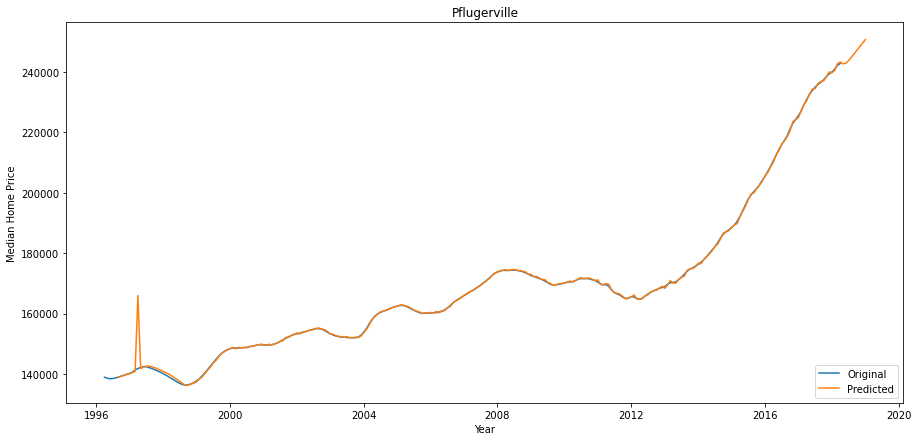

In [14]:
name, original_series, prediction_series = run_arima_model(0, 0, 273)

fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(original_series)
plt.plot(prediction_series[5:])
plt.title(name)
plt.legend(['Original','Predicted'], loc='lower right')
plt.xlabel('Year')
plt.ylabel('Median Home Price')
plt.show()

In [ ]:
prediction_series

In [ ]:
melt_row(1)

In [24]:
for i in austin_city.columns:
    cutoff = round(austin_city[i].shape[0]*0.8)

    # Define train and test sets according to the index found above
    train = austin_city[i][:cutoff]

    test = austin_city[i][cutoff:]

array([487400, 155100, 296100, 683700, 344900, 107000, 615600, 417500,
       188200, 145900, 310800, 513000, 185700, 222300, 163800])

In [64]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = train.values
y = test.values
tscv = TimeSeriesSplit()
# TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
X_train, X_test, y_train, y_test = tscv.split(X,y)

ValueError: Found input variables with inconsistent numbers of samples: [58, 15]

In [58]:
y.shape

(15,)

In [49]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = train.values
y = test.values
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index) 
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13 14 15 16 17 18 19 20 21]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] TEST: [22 23 24 25 26 27 28 29 30]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] TEST: [31 32 33 34 35 36 37 38 39]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47 48]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48] TEST: [49 50 51 52 53 54 55 56 57]


IndexError: index 15 is out of bounds for axis 0 with size 15

In [48]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

tscv = TimeSeriesSplit(n_splits = 4)
rmse = []

for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X[train_index], X[test_index]
    
    arma = sm.tsa.ARIMA(cv_train, (2,0,2)).fit(disp=False)
    
    predictions = arma.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    
print("RMSE: {}".format(np.mean(rmse)))

ValueError: endog and exog matrices are different sizes